

<br>

The aim of this analysis is to investigate a range of health-related factors and their interconnections **to classify diabetes accurately**. These factors include aspects such as **`age`**, **`gender`**, **`body mass index (BMI)`**, **`hypertension`**, **`heart disease`**, **`smoking history`**, **`HbA1c level`**, and **`blood glucose level`**. This comprehensive examination will not only provide insights into the patterns and trends in diabetes risk but will also create a solid base for further research. Specifically, research can be built on how these variables interact and influence diabetes occurrence and progression, crucial knowledge for improving patient care and outcomes in this increasingly critical area of healthcare.

<br>


<br>

### <b><span style='color:#16C2D5'>|</span> Domain Knowledge</b>

<br>


1. **`Age`:** Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases. This is partly due to factors such as reduced physical activity, changes in hormone levels, and a higher likelihood of developing other health conditions that can contribute to diabetes.

2. **`Gender`**: Gender can play a role in diabetes risk, although the effect may vary. For example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.

3. **`Body Mass Index (BMI)`:** BMI is a measure of body fat based on a person's height and weight. It is commonly used as an indicator of overall weight status and can be helpful in predicting diabetes risk. Higher BMI is associated with a greater likelihood of developing type 2 diabetes. Excess body fat, particularly around the waist, can lead to insulin resistance and impair the body's ability to regulate blood sugar levels.

4. **`Hypertension`:** Hypertension, or high blood pressure, is a condition that often coexists with diabetes. The two conditions share common risk factors and can contribute to each other's development. Having hypertension increases the risk of developing type 2 diabetes and vice versa. Both conditions can have detrimental effects on cardiovascular health.

5. **`Heart Disease`:** Heart disease, including conditions such as coronary artery disease and heart failure, is associated with an increased risk of diabetes. The relationship between heart disease and diabetes is bidirectional, meaning that having one condition increases the risk of developing the other. This is because they share many common risk factors, such as obesity, high blood pressure, and high cholesterol.

6. **`Smoking History`:** Smoking is a modifiable risk factor for diabetes. Cigarette smoking has been found to increase the risk of developing type 2 diabetes. Smoking can contribute to insulin resistance and impair glucose metabolism. Quitting smoking can significantly reduce the risk of developing diabetes and its complications.

7. **`HbA1c Level`:** HbA1c (glycated hemoglobin) is a measure of the average blood glucose level over the past 2-3 months. It provides information about long-term blood sugar control. Higher HbA1c levels indicate poorer glycemic control and are associated with an increased risk of developing diabetes and its complications.

8. **`Blood Glucose Level`:** Blood glucose level refers to the amount of glucose (sugar) present in the blood at a given time. Elevated blood glucose levels, particularly in the fasting state or after consuming carbohydrates, can indicate impaired glucose regulation and increase the risk of developing diabetes. Regular monitoring of blood glucose levels is important in the diagnosis and management of diabetes.

<br>

✔️ **These features, when combined and analyzed with appropriate statistical and machine learning techniques, can help in predicting an individual's risk of developing diabetes.**


<br>

### <b>I <span style='color:#16C2D5'>|</span> Preface</b> 

In this analysis, we have chosen the RandomForest classifier as our model. **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">The RandomForest algorithm</mark>** is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes for classification or mean prediction of the individual trees for regression.

Several reasons guided our choice of **<span style='color:#16C2D5'>Random Forest</span>** for this task:

1. **Handling of Large Data:** **<span style='color:#16C2D5'>Random Forest</span>** is capable of efficiently handling large datasets with high dimensionality. Our dataset, containing a substantial number of rows and several features, falls into this category.

2. **Robustness to Overfitting:** **<span style='color:#16C2D5'>Random Forest</span>** reduces the risk of overfitting, which is a common problem with decision trees. The algorithm accomplishes this by creating a set of **<mark style="background-color:#DDE6ED;color:black;border-radius:4px;opacity:1.0">decision trees</mark>** (a "forest") and making the final prediction based on the majority vote of the individual trees.

3. **Handling Mixed Data Types:** In our dataset, we have both numerical and categorical features. **<span style='color:#16C2D5'>Random Forest</span>** handles such mixtures smoothly, which makes it an ideal choice.

4. **Feature Importance:** **<span style='color:#16C2D5'>Random Forest</span>** provides a straightforward way to estimate feature importance. Given our aim to investigate the impact of different factors on diabetes, this characteristic is particularly useful.

5. **Non-linearity:** Medical data often contains complex and non-linear relationships. **<span style='color:#16C2D5'>Random Forest</span>**, being a non-linear model, can capture these relationships effectively.

<br>

> ⚠️ It's worth noting that while **<span style='color:#16C2D5'>Random Forest</span>** is a strong candidate given its mentioned advantages, the choice of model should always be considered with a grain of salt. Other models might perform better on the task, and it's generally a good practice to try several models and compare their performance. However, for the purpose of this analysis and given our dataset, **<span style='color:#16C2D5'>Random Forest</span>** **is a practical and reasonable starting point**.

<br>

### <b>II <span style='color:#16C2D5'>|</span> Import libraries</b> 

In [6]:
# Import Neccessary libraries
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

### <b>III <span style='color:#16C2D5'>|</span> Input the data</b> 

In [7]:
df = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")

In [10]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# 1 | EXPLORATORY DATA ANALYSIS</span>
1. Data Quality</span></b> </div>

### <b>I <span style='color:#16C2D5'>|</span> Handling Duplicates</b> 

In [8]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [9]:
df = df.drop_duplicates()

### <b>II <span style='color:#16C2D5'>|</span> Uniqueness</b> 

In [10]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


Gender has 3 unique values: give it a check

In [14]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [15]:
df[df.gender == 'Other']

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


From common sense, we know male and female on average have different risks of having the disease, given the same body conditions. So we should not randomly fill the Other gender. Furthermore, since all gender of Other samples are negative samples, and they only count toward a very minor portion of the data, we can safely remove them to clean up the data.

### <b>III <span style='color:#16C2D5'>|</span> Missing Values</b> 

In [16]:
# Checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [11]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

### <b>IV <span style='color:#16C2D5'>|</span> Describe the Data</b> 

In [19]:
df.describe().style.format("{:.2f}") # To display only 2 decimal digits.

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


2. Feature (X) Analysis</span></b> </div>

### <b>I <span style='color:#16C2D5'>|</span> Histogram for age</b> 

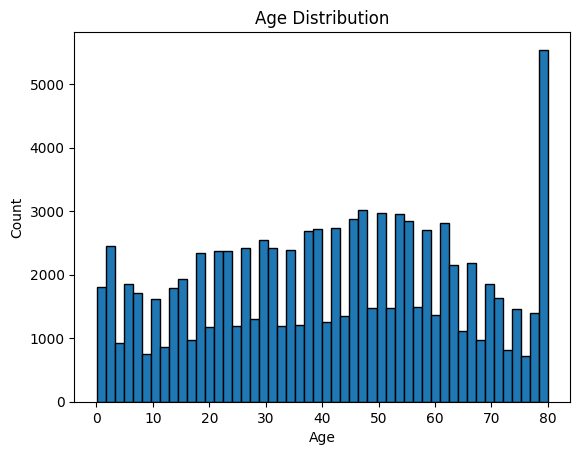

In [21]:
# Histogram for age
plt.hist(df['age'], bins=50, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### <b>II <span style='color:#16C2D5'>|</span> Bar plot for gender</b> 

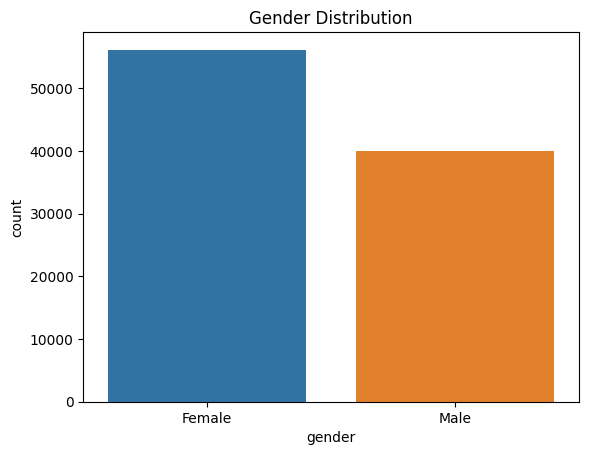

In [31]:
# Bar plot for gender
# plt bar plot need us to manually calculate the number of samples for each gender class
# which could be annoying and incovinience, so we can use sns.countplot() to replace plt
# sns is based on plt, so we can mix plt and sns codes together for the most convinient plotting experience
sns.countplot(x='gender', data=df) 
plt.title('Gender Distribution') # mix plt code with sns plot
plt.show()

### <b>III <span style='color:#16C2D5'> | </span> Distribution plot for BMI</b> 

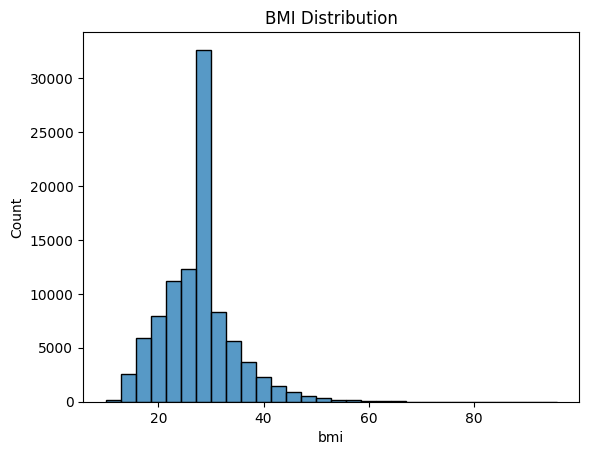

In [35]:
# Distribution plot for BMI
sns.histplot(df['bmi'], bins=30) # to replace plt.hist() since sns.histplot() automcatically include edge color for each bar
plt.title('BMI Distribution')
plt.show()

### <b>IV <span style='color:#16C2D5'>|</span> Count plots for binary variables</b> 

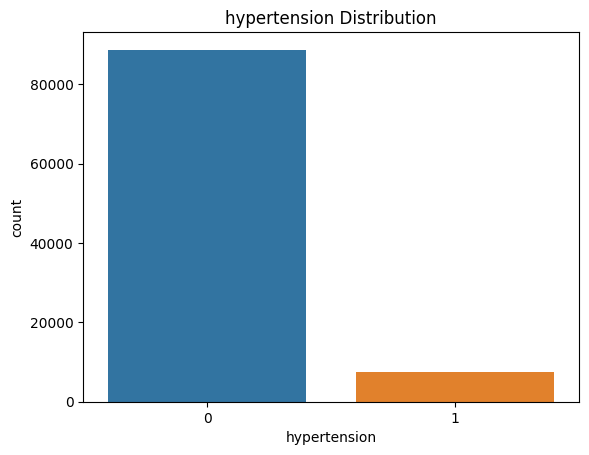

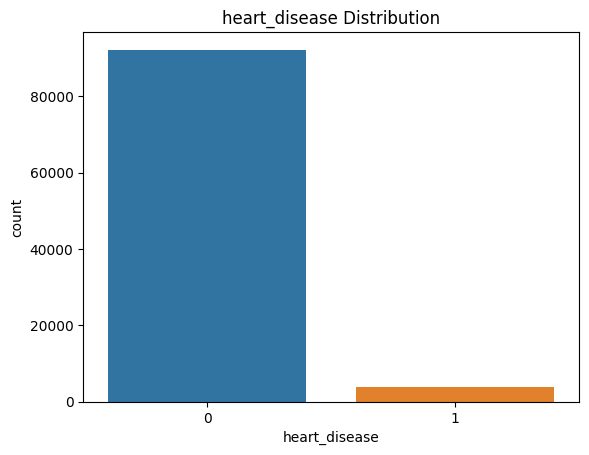

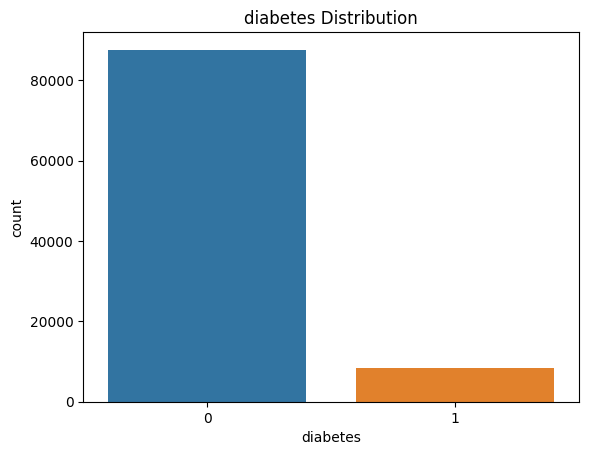

In [36]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

### <b>V <span style='color:#16C2D5'>|</span> Count plot for smoking history</b> 

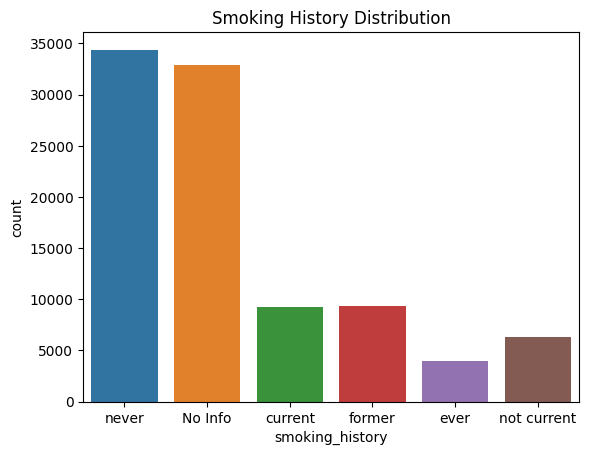

In [38]:
# Count plot for smoking history
# Again, this plot would be quite annoying to plot for plt.bar() as we need to calculate the number of samples
# belong to each smoking history categories manually
# especially in the cases of having multiple categories for one feature
# sns.countplot() does all the dirty works for us
sns.countplot(x='smoking_history', data=df) 
plt.title('Smoking History Distribution')
plt.show()

3.Bivariative Analysis
### <b>I <span style='color:#16C2D5'>|</span> Boxplot BMI vs Diabetes classification</b> 

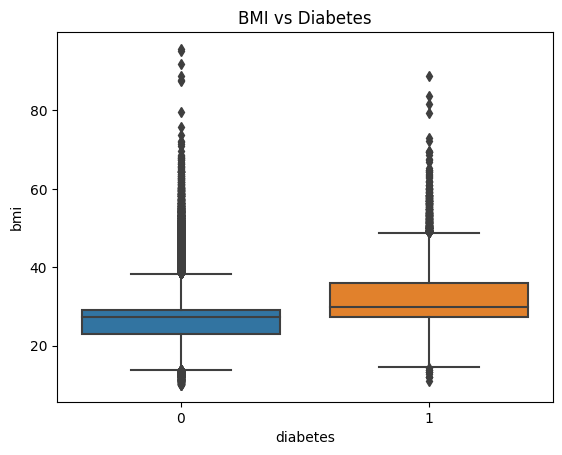

In [41]:
# Boxplot BMI vs Diabetes classification
# box plot display the distribution of feature X against samples belonging to one class of feature Y,
# it is a great plot to gain understanding of some cross-feature patterns in the data
# Mostly, we use boxplot for feature Y that are binary or categorical (multiclass) data
# and for feature X that is numerical and continuous.
# If X is binary or categorical (e.g., smoking status, gender),
# bar plot or scatter plot is a better choice than box plot.
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

### <b>II <span style='color:#16C2D5'>|</span> Boxplot Age vs Diabetes classification</b> 

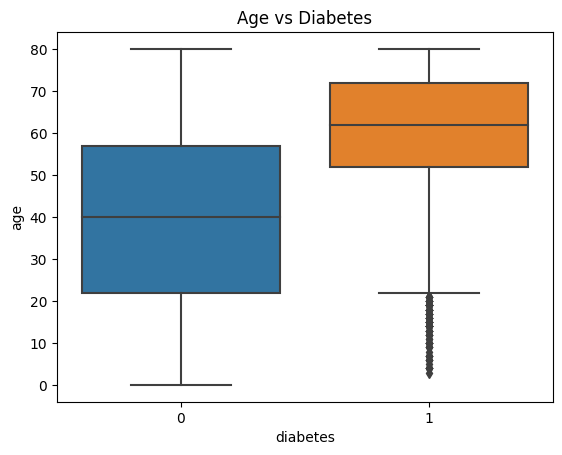

In [40]:
# Boxplot Age vs Diabetes classification
# We try to gain understandings toward all X features vs. our Y (diabetes or not)
# But in reality we might have a huge amount of X (e.g., 100 distinct columns)
# Use your empirical knowledge and common sense (sometimes some luck) to plot Xs that you think are 
# most important in predicting Y
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

### <b>III <span style='color:#16C2D5'>|</span> Count plot of gender vs diabetes</b> 

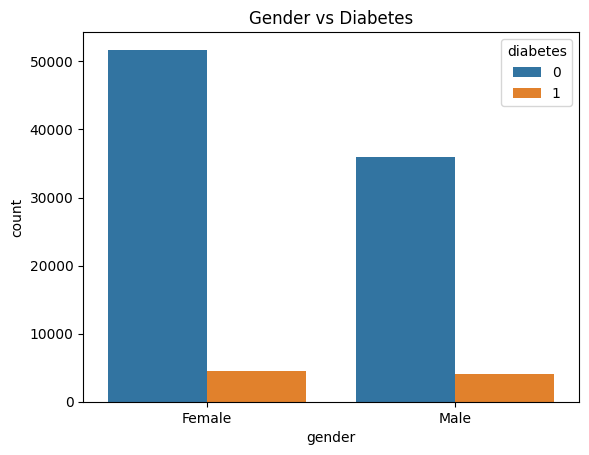

In [42]:
# Count plot of gender vs diabetes
# Since gender is a binary feature, we will not use box plot here.
# Instead, let's use bar plot, which can plot individually for each gender with or without diabetes separately.
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

### <b>III <span style='color:#16C2D5'>|</span> Boxplot HbA1c level vs Diabetes classification</b> 

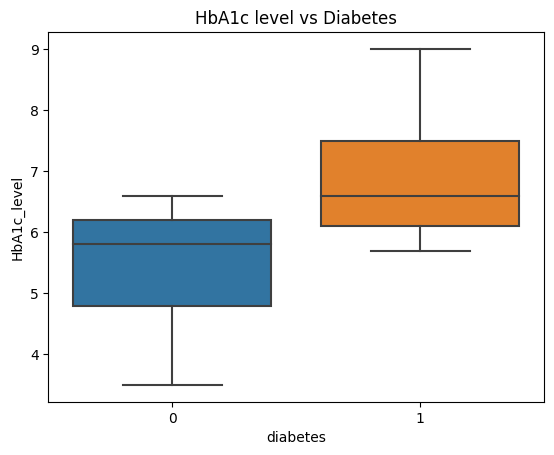

In [43]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

### <b>IV <span style='color:#16C2D5'>|</span> Boxplot blood glucose level vs Diabetes classification</b> 

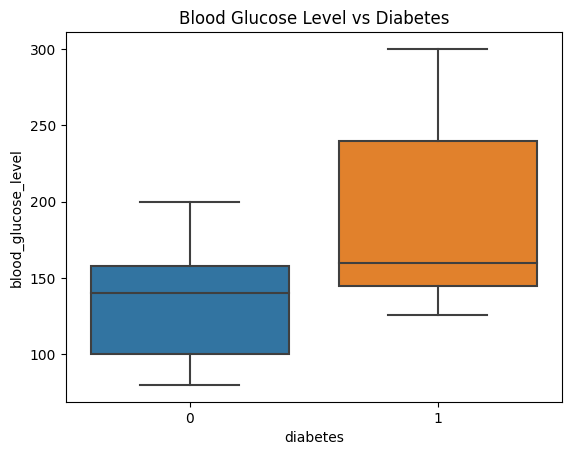

In [44]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

### <b>V <span style='color:#16C2D5'>|</span> Pair plot for numeric features</b> 

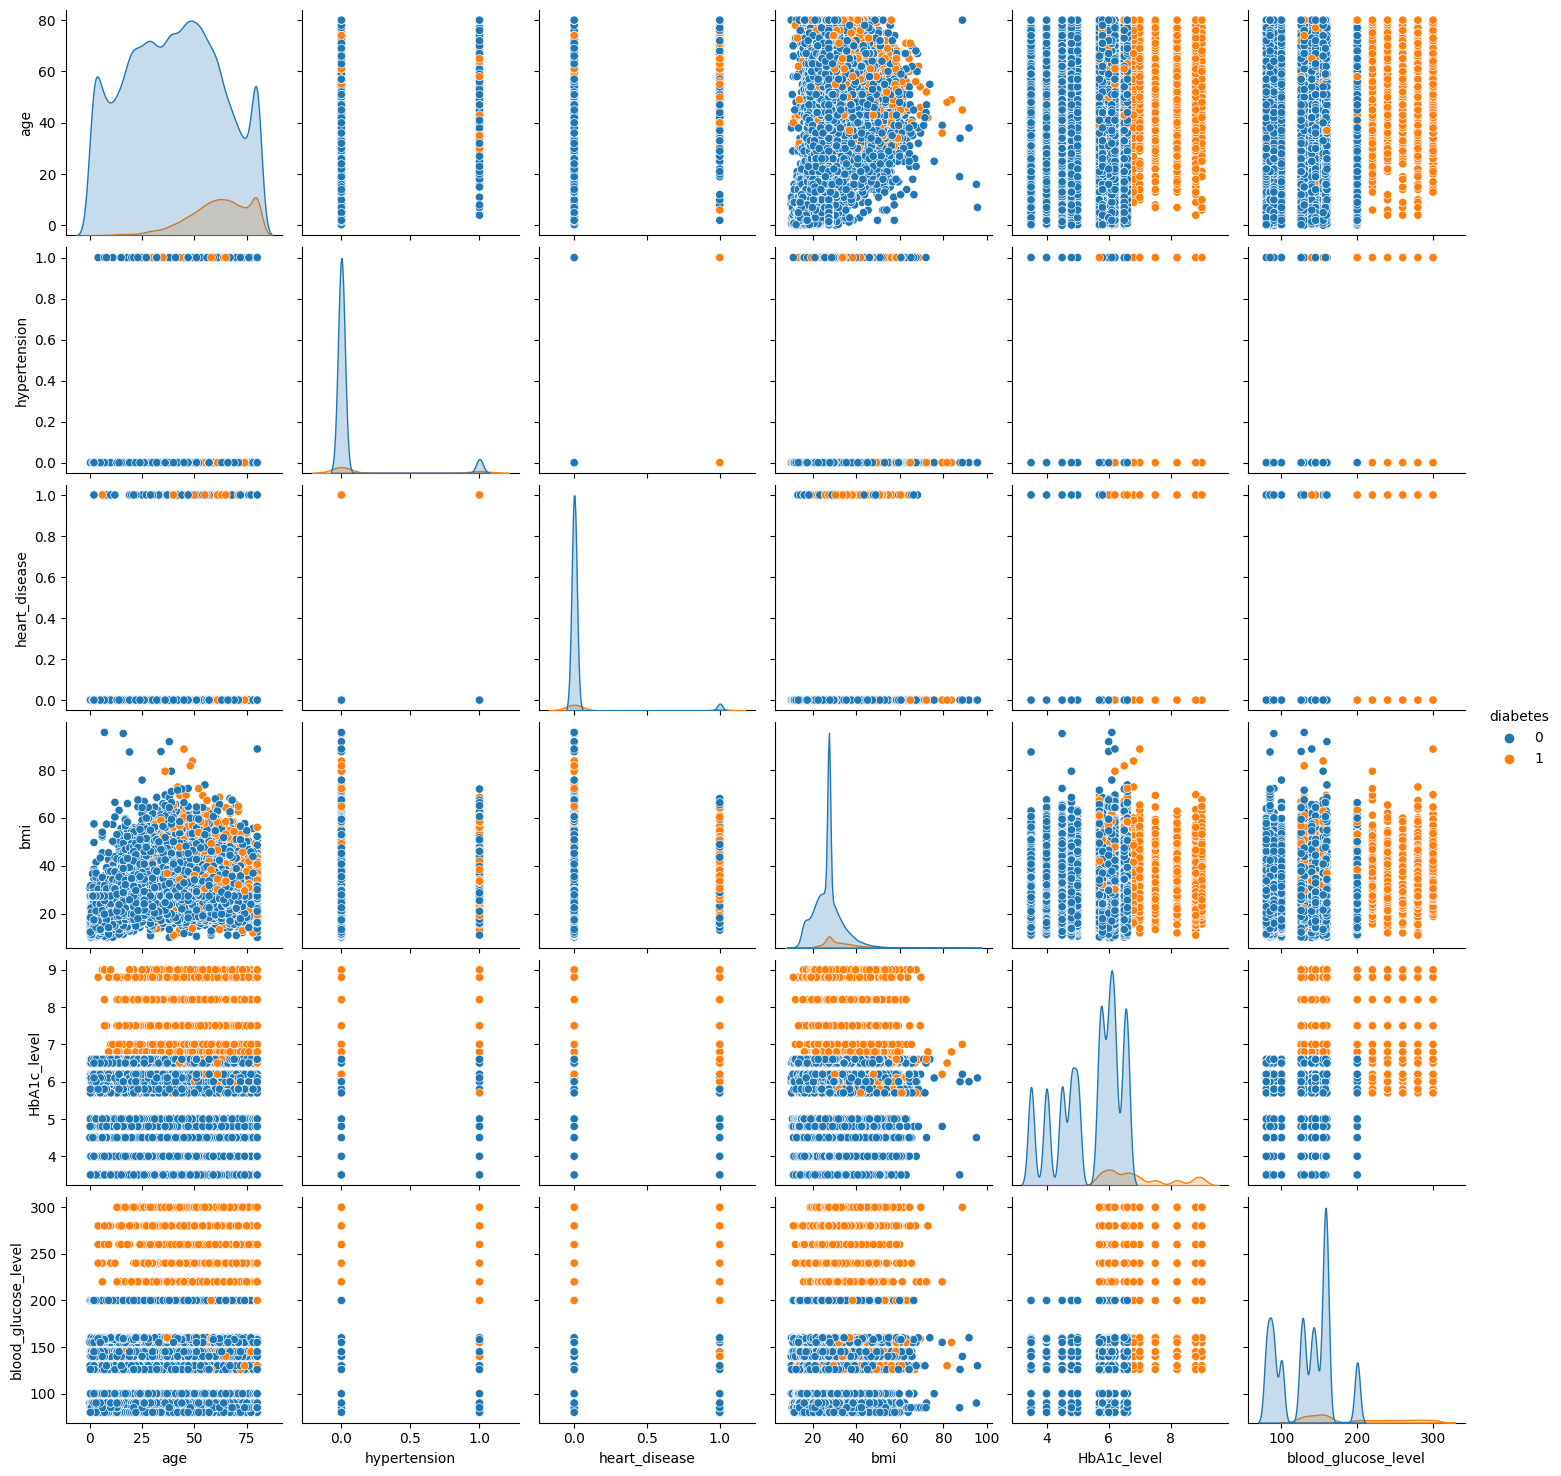

In [45]:
# Pair plot for numeric features
# sns.pairplot() will plot all possible combinations of numerical features for us
# we can further use the parameter hue='your_feature_name' in the plot() function to
# use different colors to separate different classes from the hue feature
sns.pairplot(df, hue='diabetes')
plt.show()

### <b>I <span style='color:#16C2D5'>|</span> Scatterplot Age vs BMI colored by Diabetes classification</b> 

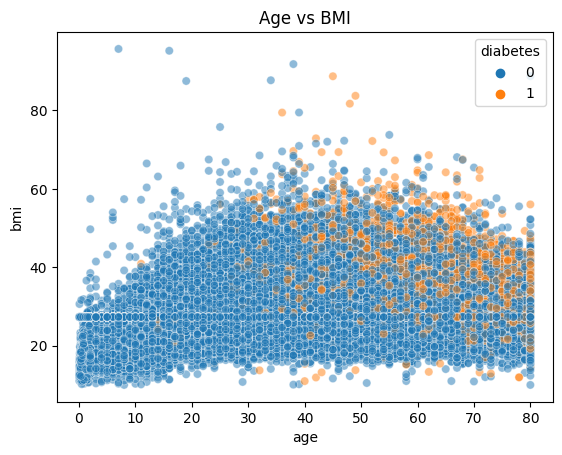

In [50]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df, alpha=0.5) # alpha to adjust the transparency of the dots
plt.title('Age vs BMI')
plt.show()

### <b>II <span style='color:#16C2D5'>|</span> Violin plot of BMI against diabetes classification split by gender</b> 

### <b>III <span style='color:#16C2D5'>|</span> Interaction between gender, BMI and diabetes</b> 

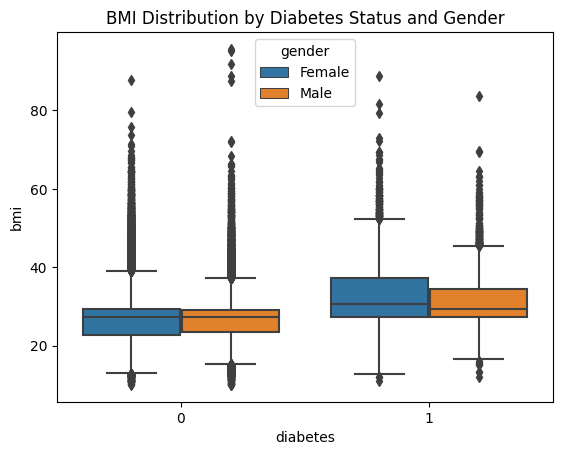

In [52]:
# Interaction between gender, BMI and diabetes
# See if there are differences in bmi distributions across different gender and
# diabetes vs. non-diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

### <b>IV <span style='color:#16C2D5'>|</span> Interaction between gender, Age and diabetes</b> 

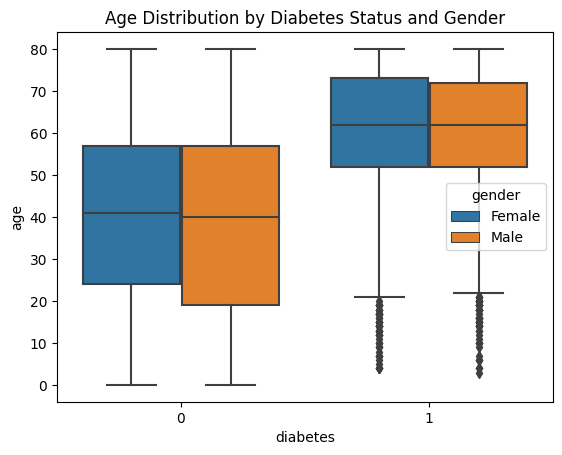

In [53]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

# 2 | CORRELATION 

### <b>I <span style='color:#16C2D5'>|</span> Data preparation</b> 

In [56]:
# Define a function to map the existing categories to new ones
# This is another example of data preprocessing:
# For smoking status, the original data has too many categories
# For data analytics and machine learning, more is not always better
# Especially when those categories are not that distinct from each others
print(df['smoking_history'].unique())


['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [12]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']: # We assume no info is non-smoking
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']: # ever, former, and not current are almost the same, so let's combine them
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

non-smoker     67276
past_smoker    19655
current         9197
Name: smoking_history, dtype: int64


In [13]:
# Create a copy of the processed data
# as the following data processing is only aimed for the models used in this analytic.
# the df can be exported for other analyses.
data = df.copy() 

### <b>II <span style='color:#16C2D5'>|</span> Encoding</b> 

### While we can code features with more than two unique categories into cardinal form (0, 1, 2, 3, etc..), most machine learning models perform better if we convert the feature to a form called: <br><br> One-hot encoding<br><br>What is one-hot encoding? Simple example: if you have a "Color" feature with values "Red", "Green", and "Blue", one-hot encoding would create three new columns: "Red", "Green", and "Blue". If a row has "Red", the "Red" column would be 1, and the other columns would be 0. 

### pd.get_dummies() does the one-hot encoding for us.<br>However, we have to keep one thing in mind: pd.get_dummies() create n columns for a feature with n distinct categories.

### This is problematic for some machine learning algorithms, especially for linear regression and logistic regression models.
### In short, some machine learning algorithms rely on matrix algorithms to solve a system (solve the X to predict Y problem), and those algebra (matrix) algorithms do not work with duplicated columns.

### Where does the duplication come from? Think about the example above:
#### If one sample is not red and not green, it is definitely blue. So the blue column is an unnecessary and duplicated column.
#### For all one-hot encoded features, we only need n-1 encoded columns. You can drop any column (red, green, or blue), it doesn't matter.

In [14]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

In [61]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'smoking_history_current', 'smoking_history_non-smoker',
       'smoking_history_past_smoker'],
      dtype='object')

We will drop gender male, and smoking_history_non-smoker

In [15]:
data = data[[i for i in data.columns if i != 'gender_Male' and i != 'smoking_history_non-smoker']]

### <b>III <span style='color:#16C2D5'>|</span> Correlation Matrix</b> 

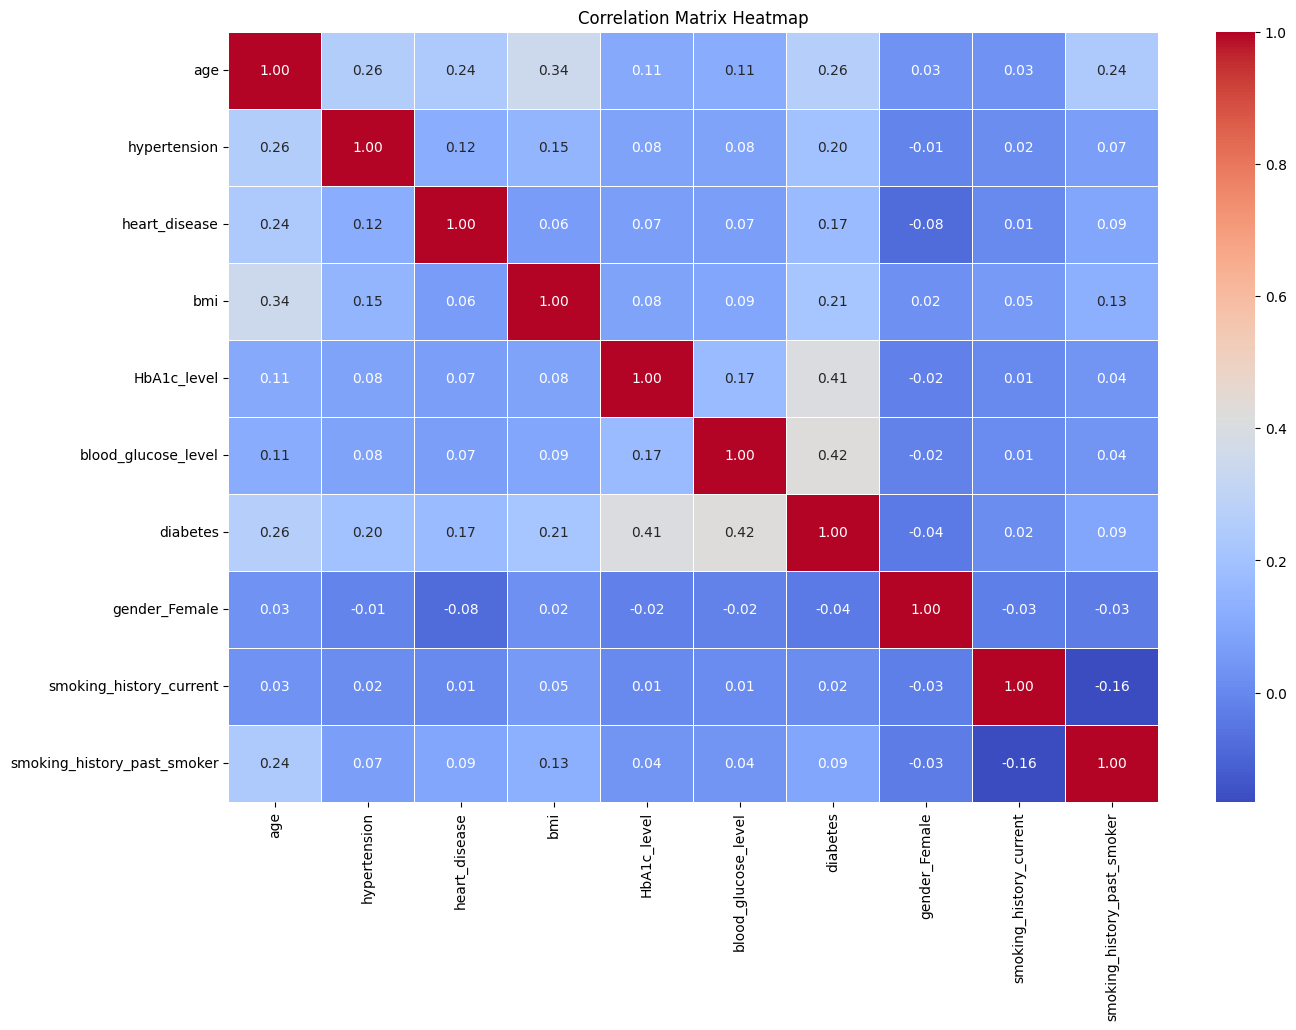

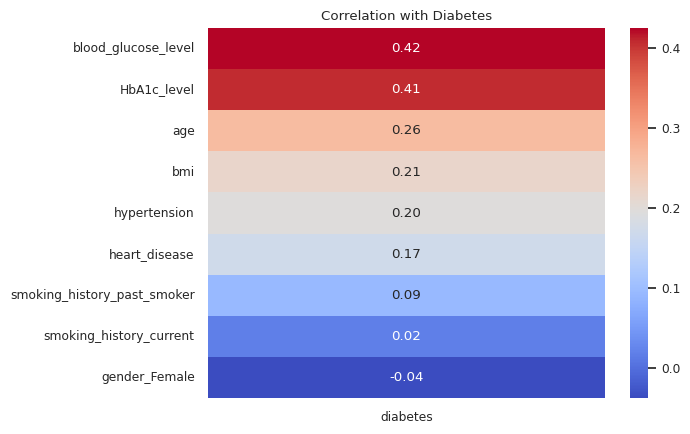

In [63]:
# Compute the correlation matrix
# It is always a good idea to perform this correlation check before you throw anything to your model
# Highly correlated Xs are not good for model, as they could be noisy
# e.g., if two X features have a correlation score > 0.7 or 0.8,
# you should definetly consider to drop one of the feature
#Graph I
# Create a heatmap of the correlations within the X features
# We can use the df.corr() method by pandas to calculate all pairs of correlation score automatically
# The result is a dataframe, with all columns in the df
# We can then use sns.heatmap() to easily plot the correlation scores
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
# annot: display the correlation scores numerically in the plot
# cmap: the color bar to use
# linewidths: adjust the width of cell border 
# fmt: format, we typically use this parameter to set the number of floating points to display
# again, '.2f' means two decimal points
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column (X vs. Y)
# Since we are only plotting the corr of X vs. Y, we only need the diabetes column which is our Y
# We also need to drop the row with the index of diabetes, since that row represent the correlation between
# diabetes and diabetes
# which is always 1
# meaningfulless row
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Some fancy plotting calls to make a pretty plot, try out yourself
# Read the sns documentation or search google / GPT / Gemini / Deepseek for "seaborn styling and formatting"
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

# 3 |  PREDICTIVE ANALYSIS

In [ ]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

## 2.Preprocessing : Scaler

Preprocessing is a crucial step before training the model. In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded. **<span style='color:#16C2D5'>Standardization</span>** is not required for all models but is generally a good practice. It is highly recommended if the histogram of the specific feature is not really normal distributon or is skewed**<span style='color:#16C2D5'>One-hot encoding</span>** is necessary for categorical variables to be correctly understood by the machine learning model.

The **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">StandardScaler</mark>** in sklearn is based on the assumption that the data, Y, follows a distribution that might not necessarily be Gaussian (normal), but we still transform it in a way that its distribution will have a mean value 0 and standard deviation of 1.</p>

<p>In other words, given a feature vector <em>x</em>, it modifies the values as follows:</p>

<p class="formulaDsp">
\[ Y_i = \frac{x_i - \mu(\vec{x})}{\sigma(\vec{x})} \]
</p>

**where:**
<ul>
<li>\( x_i \) is the i-th element of the original feature vector \( \vec{x} \),</li>
<li>\( \mu(\vec{x}) \) is the mean of the feature vector, and</li>
<li>\( \sigma(\vec{x}) \) is the standard deviation of the feature vector.</li>
</ul>

<p>The transformed data \( Y \) (each \( Y_i \)) will have properties such that \( mean(Y) = 0 \) and \( std(Y) = 1 \).</p>

> This transformation is also known as Z-score normalization.


In [16]:
# Define preprocessor
# sklearn has prebuilt preprocessor for us
# for standardization, we have sklearn.preprocess.StandardScaler()

col_to_standardize = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']
for col in col_to_standardize:

    transformer = StandardScaler() # Call the scaler out, one feature needs a separate scaler from other features
    transformed_data = transformer.fit_transform(data[col].values.reshape(-1, 1)) # the scaler only takes (n, 1) shaped array so we need to reshape
    data[f"{col}_t"] = transformed_data # insert the transformed column back to the data as a new feature

## 3. Model Building and Hyperparameter Tuning

The data is transformed, processed, and is ready for further analysis using machine learning methods. We use a **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">RandomForestClassifier</mark>**, which is a popular and powerful algorithm for classification tasks. The model's hyperparameters are tuned using **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">GridSearchCV</mark>** , which performs an exhaustive search over the specified parameter values for the estimator. The best performing model is selected based on testing accuracy

Random forest is an extended model based on decision tree model we saw in previous class. We learned about the idea of overfitting vs. underfitting. Although we know the goal is to neither overfit the model nor underfit the model, in reality we often cannot find the perfect point. Furthermore, we often face the trade-off between bias and variance. 

Bias refers to underfitting: the model is stable when predicting unseen samples (future) but consistently missing the target value by a distance from the same direction (e.g., always have a +- 10% off). Variance refers to the model being very sensitive (imagine a super complicated curve to predict the highly non-linear relationship between X and Y). Being super sensitive can make the model perform very well in training, but we could have very off-target predictions for unseen samples, as one minor differences from the unseen sample against the training sample would make the model react significantly deviated from the actual fact.

Very similar to the idea of underfitting and overfitting right? And we definitely don't like this tradeoff.

Random forest is a machine learning mechanisim (called ensemble learning) that aims to reduce bias while reducing variance at the same time. We know if a model is too large (e.g., if we have 1000 training samples, but we build a decision tree model with 1000 end leaf nodes, the model can memorize each training sample's target output Y. Each leaf node Y just represents one sample's value), the model could potentially memorize the training data and thus overfitting. Conversly, if the model size is too small, the model does not has enough capability to really learn the data's pattern so that it is "lacking" some capabilities to make accurate predictions. 

Let's rewind some basic statistics: central tendency theory tells us that even if one sample has a huge variance, once we have enough sample size (each sample is slightly different from each other, of course), the overall variance of the whole population will be much smaller, while the mean stays close to the individual samples' median values of individual samples' means.

So, we can utilize this idea to reduce the model variance without lossing model size. Random forest, as suggested by its name "forest", constructs many slightly different decision trees which jointly predict on a given input X.

The idea is also similar to democracy voting system: the majority of voice gets elected. In this way, we hopefully mitigate the risks of one individual making a super biased or super variant action.

Majority of vote, is how a random forest model make predictions on classification problem. Suppose we constructed a random forest model with 30 different trees, and when making a new prediction on a previously unseen sample, if there are 20 trees classified the sample as a positive class while the rest 10 trees classified the sample as negative, the final prediction is positive.

For regression problem, each tree is likely to have completely different (subtly different but still different) predictions, so following the central tendency theory we take the 30 trees' regression predictions mean to be the final prediction.

How can we make sure each tree is at least slightly different? You might think: we can set each tree to have different hyperparameters like different max_depth and max_leaf_node. However, we cannot do that: (1) We cannot use different structured models to form a forest, as some of the models with very small model sizes are for sure gonna be losers. Why involve them anyway then? (2) There are likely not enough different model parameters (hyperparameters) combinations for us to construct a large enough forest.

Instead of having trees with different structures, we have trees with different "expertises" in the training data. For a complicated surgery, a hospital engages medical experts from different areas (physician, cardio, tumor, etc..). Similarly, we can train "differently specialized" trees by giving each tree slightly different partial training data. E.g., each tree only receive 8 randomly selected columns from the total of 10 columns in the full training set, and randomly selected 80% rows from the full rows.

Furthermore, to create a more diversed and different training sample for each of the tree in a forest, we also embrace a sampling method called bootstrapping: for each sample set, the rows are randomly drawed from the full dataset with REPLACEMENT, meaning that one sample could be selected multiple times in any given sub-sample set.

Imagine we have a bag of 10 balls, with 3 colors (red, blue, green). We pick a ball randomly from the bag, record the color of the ball, put the ball back to the bag, and repeat this process for 8 times. After 8 times, we have a sub-sample dataset. Following the same way. we construct 10 sub-sample datasets, each with different samples and some repeating samples. Finally, we create 10 decision tree models, each tree learns on on sub-sample dataset. This is how we train a random forest model.

In short, random forest is a more advanced and performing model compares to simple models like decision tree and SVM.

In [22]:
# Define the hyperparameters and the values we want to test
# Instead of writing loops manually to test all hyperparameter combinations to find the best setting
# We use sklearn's GridSearchCV to automate the best hyperparam combination.
# First, we need to define all hyperparams we want sklearn to test for us, in a dictionary
# The key is the hyperparameter name of the model we will be training, 
# The value is a list containing all values we want to test for that hyperparams
param_grid = {
    # how many trees we are having in the random forest model, larger means bigger model and potentially more powerful,
    # most important param for random forest
    # even though we mentioned that random forest suffers less from variance (overfitting) by combining multiple trees
    # it will still be overfitted if the forest size is too large
    # plus, forest with too many trees is very slow to train and run predictions
    # your computer may not be able to run it at all if it becomes too large
    # so we need to find the ideal number of trees for each dataset.
    'n_estimators': [50, 100, 200], 
    
    'max_depth': [None, 10, 20], # same as decision tree, the max depth each tree can grow to. The larger this number the larger (deeper) the model, and None means no limit.
    
    # also important hyperparameter for random forest: for each split in a tree (go back to Week 10 slides or GPT it if you forgot what split is)
    # What is the minimum amount of samples that meet the spliting condition (both < and > condition)
    # If the minimum amount is not met, the proposing split cannot be make.
    # The smaller this hyperparameter is, the larger the model (as the model can make more splits to grow both deeper and wider)
    'min_samples_split': [2, 5, 10],
    
    # Similar to the idea of max_leaf_node but in a more indirect way:
    # For each end leaf node that is producing a final prediction, what is the required minimum number of training samples that fit into all paths (splits) leading to this node?
    # The smaller this hyperparameter is, the larger the model (as the model can grow more end leaf node to be more sensitive on input X)
    'min_samples_leaf': [1, 2, 4]
}

In [18]:
# Then we define the random forest model class
# sklern.ensemble.RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

For GridSearch or any model hyperparameter search, we cannot use the test dataset to evaluate each combination's performance:<br>
We still have the risk of overfitting / underfitting if we only evaluate the model on one validation set.<br>
We want as much test data as possible for our hyperparameter search, but we only have limited training data so we cannot make more splitting from the training data.<br>
Solution: cross-validation<br>
We do splittings on the training set.<br>
Suppose we further divide the training data into 5 equal, non-overlapping subsets,<br>
for each time we train the model on 4 subsets, and evaluate on the 1 remaining subset.<br>
We will have 5 different training subsets, and 5 different test sets.<br>
Similar to the idea of random forest right?

In [19]:
# Find the columns for X and Y
print(data.columns)

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female',
       'smoking_history_current', 'smoking_history_past_smoker', 'age_t',
       'bmi_t', 'HbA1c_level_t', 'blood_glucose_level_t', 'hypertension_t',
       'heart_disease_t'],
      dtype='object')


In [20]:
x_col = ['age_t', 'hypertension_t', 'heart_disease_t', 'bmi_t', 'HbA1c_level_t', 'blood_glucose_level_t', 'gender_Female', 'smoking_history_current', 'smoking_history_past_smoker']

In [23]:
# Create Grid Search object
# sklearn.model_selection.GridSearchCV()
from sklearn.model_selection import GridSearchCV
# We put the model and the parameter dictionary as the first and second parameters for the GridSearchCV()
# Lastly, to evaluate each hyperparam's performances, we use cross validation (cv)
# Typically we set cv=5 or 10
# It is generally considered that the larger the better, but we need to consider code running time
# The larger the number of cv, the more times we need to train a same model on different cv datasets, longer to train
# 5 is empirically acceptable
# If you want to go with precision, go with 7, 8, 9, 10, etc..
grid_search = GridSearchCV(model, param_grid, cv=5) 

# Split data into train and test sets
# random_state: computer is not truely random. Instead, it is pre-coded with many random strategies, represented by an integer
# by setting the random_state to a fixed number, we can repeat the random results next time
# generally it is a good practice to set the random_state with your favorite or luckly number
# 42, 0, 1010, 1515 are some commonly used random state, but feel free to use other numbers
X = data[x_col]
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the GridSearch to get the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best parameters
# The best performing combination is recorded by the GridSearchCV object, with an attribute name of best_params_
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


### <b><span style='color:#16C2D5'>|</span> Intepret the results </b>

The result shows the best parameters for our **<span style='color:#16C2D5'>Random Forest model</span>** that were found during the hyperparameter tuning process:

1. **max_depth of 10:** This indicates that the maximum depth of the trees in the forest is 10 levels. Constraining the depth of the tree helps in reducing overfitting. It appears from this result that a medium-complexity tree works best for our data. Too much complexity (a deeper tree) may capture noise, and too little (a shallower tree) may not capture the underlying structure of the data.

2. **min_samples_leaf of 4:** This means that each leaf (the end node of a decision tree, where predictions are made) must contain at least 4 samples. This parameter, like max_depth, is a way to control overfitting. By requiring at least two samples to make a prediction, the model prevents fitting to outliers or noise in the training data.

3. **min_samples_split of 10:** This tells us that a node must contain at least 10 samples in order to be split (to create two child nodes). Similar to the min_samples_leaf parameter, this can help control overfitting.

4. **n_estimators of 50:** This is the number of decision trees in the forest. The Random Forest algorithm works by averaging the predictions of many decision trees to make a final prediction, which helps reduce overfitting and variance. In this case, it seems that having 50 trees in the forest gives us the best performance.

<br>

<div style="border-radius:10px;border:#16C2D5 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
     💬 These parameters are a result of the Hyperparameter tuning process , and they give us insight into the structure of the data and the complexity of the model that best captures that structure. The moderately constrained tree depth and the requirements for the number of samples at each node suggest a model that is complex enough to capture the important patterns in the data, but not so complex that it overfits to noise or outliers.This balance is crucial in creating a model that will generalize well to new data.

</div>
 
    
    

![](https://digitalpress.fra1.cdn.digitaloceanspaces.com/mhujhsj/2022/09/Internal-Nodes-crop-1.png)

<br>

> Remember, these are the optimal parameters given the parameter grid we defined and the specific dataset at hand. For a **different dataset** or with a **different parameter grid**, **the optimal parameters could be different.**

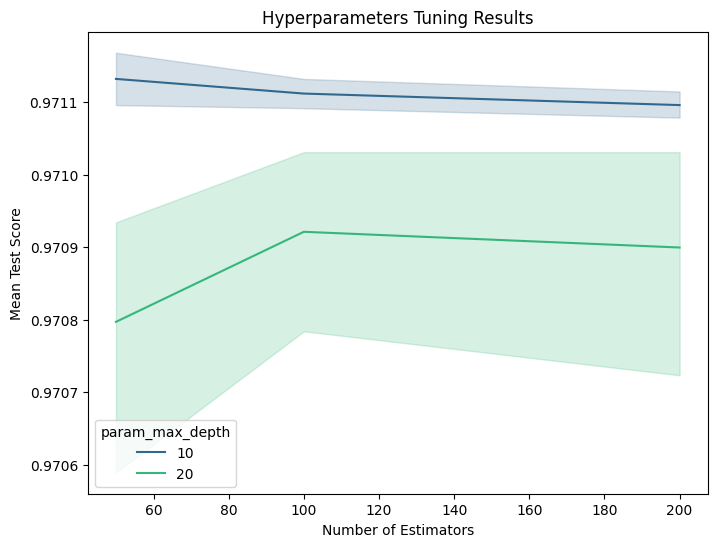

In [26]:
# Convert GridSearchCV results to a DataFrame and plot
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

## 4. Confusion Matrix</span></b> </div>

The trained model is evaluated on the **test set**. **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">Confusion matrix</mark>** is used to visualize the performance of the model. It shows the true positive, true negative, false positive, and false negative predictions of the model.

<br>

![](https://miro.medium.com/v2/resize:fit:1218/1*jMs1RmSwnYgR9CsBw-z1dw.png)

#### **<span style='color:#16C2D5'>Precision:</span>**

Precision is a measure of how many of the true positive predictions were actually correct. It is defined as the number of true positives (TP) divided by the sum of true positives (TP) and false positives (FP).

<p class="formulaDsp">
\[ Precision = \frac{TP}{TP + FP} \]
</p>

#### **<span style='color:#16C2D5'>Recall:</span>**


Recall (or Sensitivity) is a measure of how many of the actual positive cases were identified correctly. It is defined as the number of true positives (TP) divided by the sum of true positives (TP) and false negatives (FN).

<br>

<p class="formulaDsp">
\[ Recall = \frac{TP}{TP + FN} \]
</p>

#### **<span style='color:#16C2D5'>F1-Score:</span>**


The F1 score is the harmonic mean of Precision and Recall and tries to find the balance between precision and recall. It is defined as 2 times the product of precision and recall divided by the sum of precision and recall.

<br>

<p class="formulaDsp">
\[ F1 Score = \frac{2 * Precision * Recall}{Precision + Recall} \]
</p>

<br>
    
<div style="border-radius:10px;border:#16C2D5 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">     
    <b><span style='color:#16C2D5'>|</span> In all of these formulas: </b>
    
True Positives (TP) are the cases in which we predicted yes (diabetes present), and the actual was also yes.
True Negatives (TN) are the cases in which we predicted no, and the actual was also no.
False Positives (FP) are the cases in which we predicted yes, but the actual was no.
False Negatives (FN) are the cases in which we predicted no, but the actual was yes.   
</div>  


Model Accuracy:  0.9692083636741912
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       1.00      0.65      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



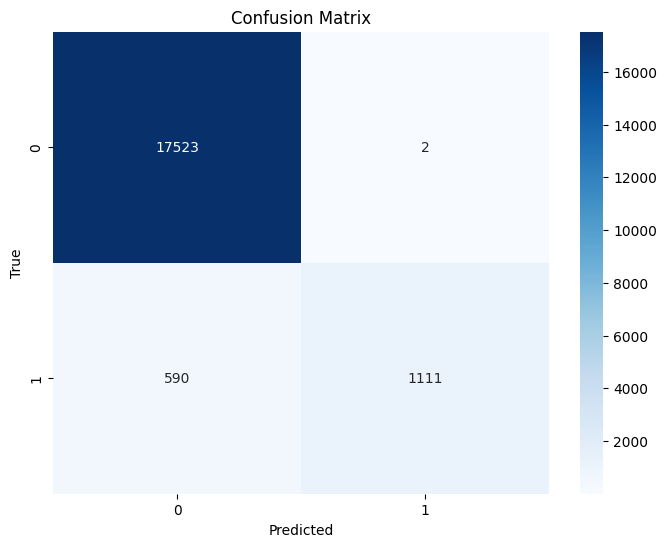

In [27]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### <b><span style='color:#16C2D5'>|</span> Intepret the results </b>

Our trained **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">Random Forest Model</mark>** achieved an accuracy of around 95%. This indicates that the model correctly classified around 95% of all cases in the test set.

Looking deeper into the classification metrics, let's dissect the performance for each class (0 and 1) separately:

#### <b><span style='color:#16C2D5'> A |</span> Class 0 (Non-diabetes): </b>
- The model has a high precision (0.98) for class 0, meaning that among all instances where the model predicted non-diabetes, 98% were indeed non-diabetes. 
- The recall for class 0 is also high (0.96). This means that our model correctly identified 96% of all actual non-diabetes cases in the dataset. 

#### <b><span style='color:#16C2D5'> B |</span> Class 1 (Diabetes): </b>
- The precision for class 1 is lower around (0.65), which indicates that when the model predicted diabetes, it was correct around 65% of the time. 
- However, the recall is reasonably high around (0.80). This means that our model was able to capture around 80% of all actual diabetes cases. 

The F1 score, a harmonic mean of precision and recall, is around 0.97 for class 0 and around 0.72 for class 1. The weighted average F1 score is around 0.94, in line with the overall accuracy.

This discrepancy in performance between classes is likely due to the imbalance in the original dataset. Class 0 (Non-diabetes) is the majority class and has more examples for the model to learn from.

> However, the higher recall for class 1 (Diabetes) is promising. This is an essential aspect for a healthcare model, as missing actual positive cases (false negatives) can have serious implications. 

<BR>
    
<div style="border-radius: 10px; border: #16C2D5 solid; padding: 15px; background-color: #ffffff00; font-size: 110%; text-align: left;">
    📝 In summary, while our model performs well overall, it particularly excels with the majority class (non-diabetes). To enhance performance on the minority class (diabetes), we can further address class imbalance or adjust model parameters. Despite these areas for improvement, the model's ability to accurately identify a high percentage of actual diabetes cases is encouraging at this early stage of model development. Subsequent iterations and refinements are expected to enhance precision in diabetes predictions without compromising recall.
</div>    
    

## 5. Feature Importance
Finally, the importance of each feature is computed. This is the total decrease in node impurity (weighted by the probability of reaching that node, which is approximated by the proportion of samples reaching that node) averaged over all trees of the ensemble. **The feature importance gives insight into which features are most useful for making predictions.** The features are ranked by their importance and visualized using a bar plot.

                       Feature  Importance
4                HbA1c_level_t    0.541195
5        blood_glucose_level_t    0.381450
0                        age_t    0.029740
3                        bmi_t    0.023283
1               hypertension_t    0.015192
2              heart_disease_t    0.006176
8  smoking_history_past_smoker    0.001440
6                gender_Female    0.001186
7      smoking_history_current    0.000339


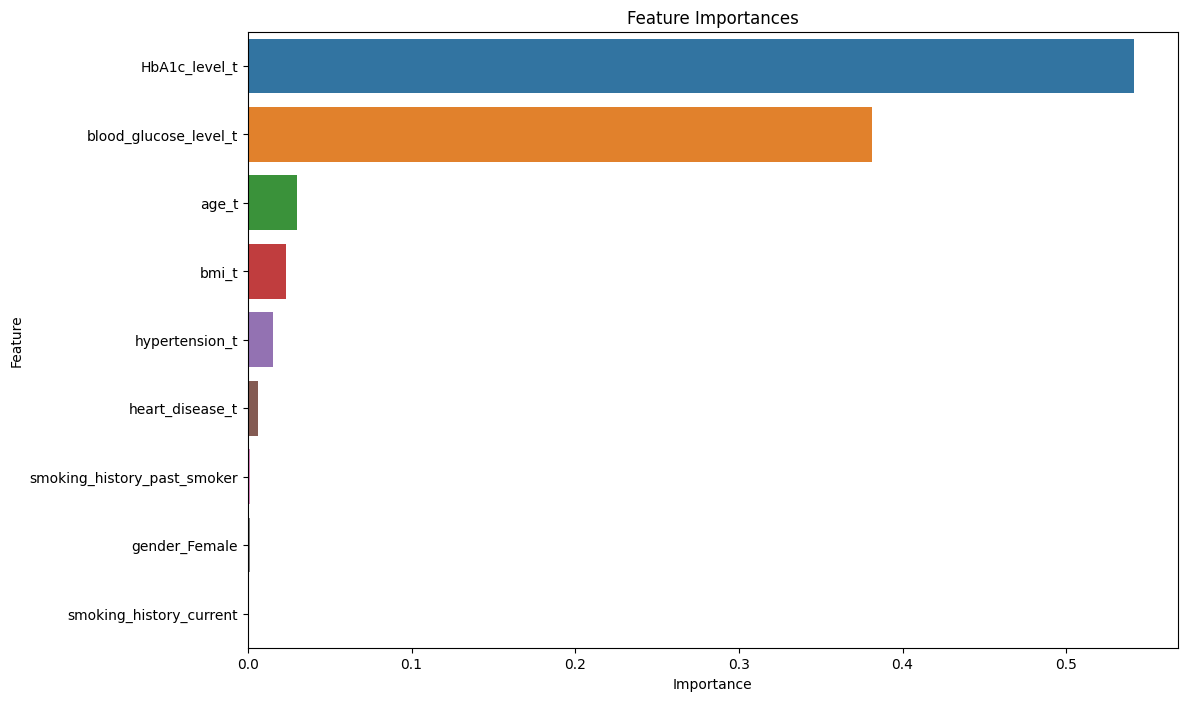

In [33]:
# And now let's get the feature importances
importances = grid_search.best_estimator_.feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': x_col, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()